# **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from imblearn.over_sampling import RandomOverSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
    accuracy_score,
    mean_absolute_error,
    mean_squared_error
)
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
import warnings
warnings.simplefilter("ignore")

## Import Dataset

In [3]:
df = pd.read_csv("advertising.csv")

In [4]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.duplicated().sum()

0

# Data Visualization

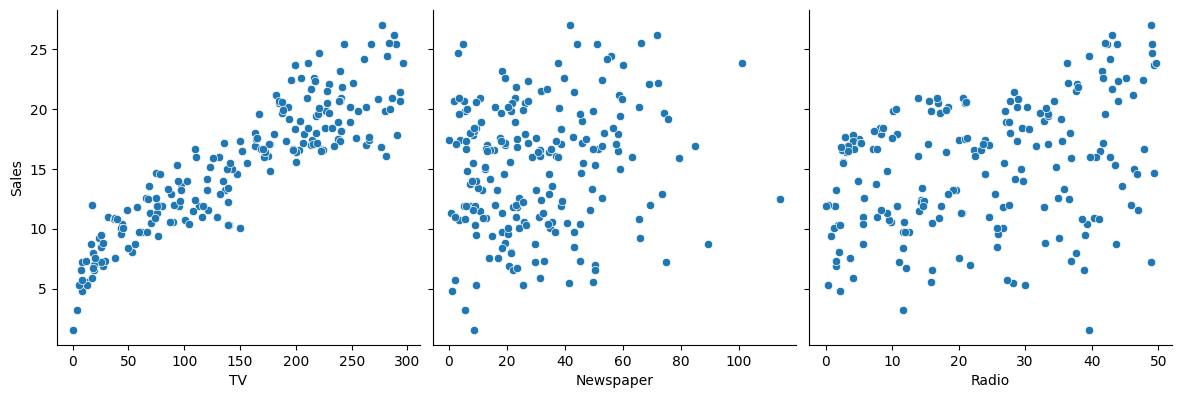

In [10]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

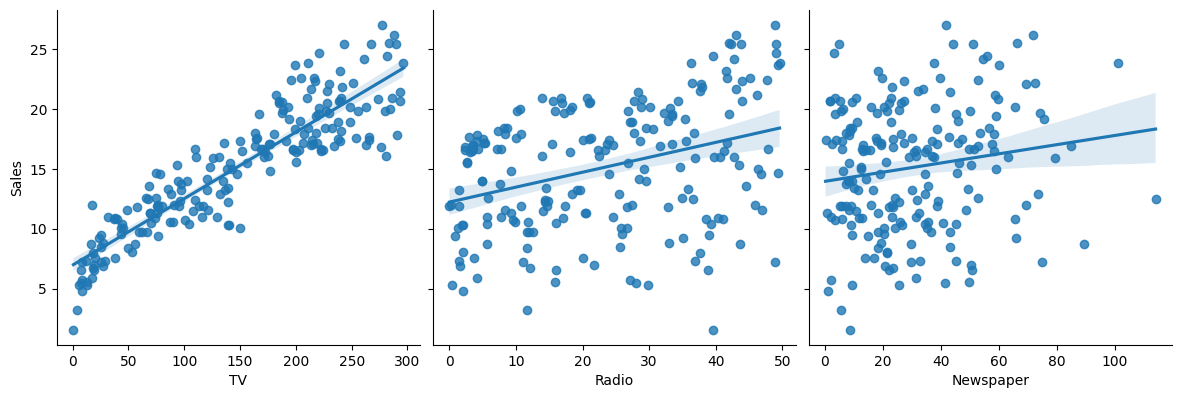

In [11]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=4, aspect = 1, kind='reg');

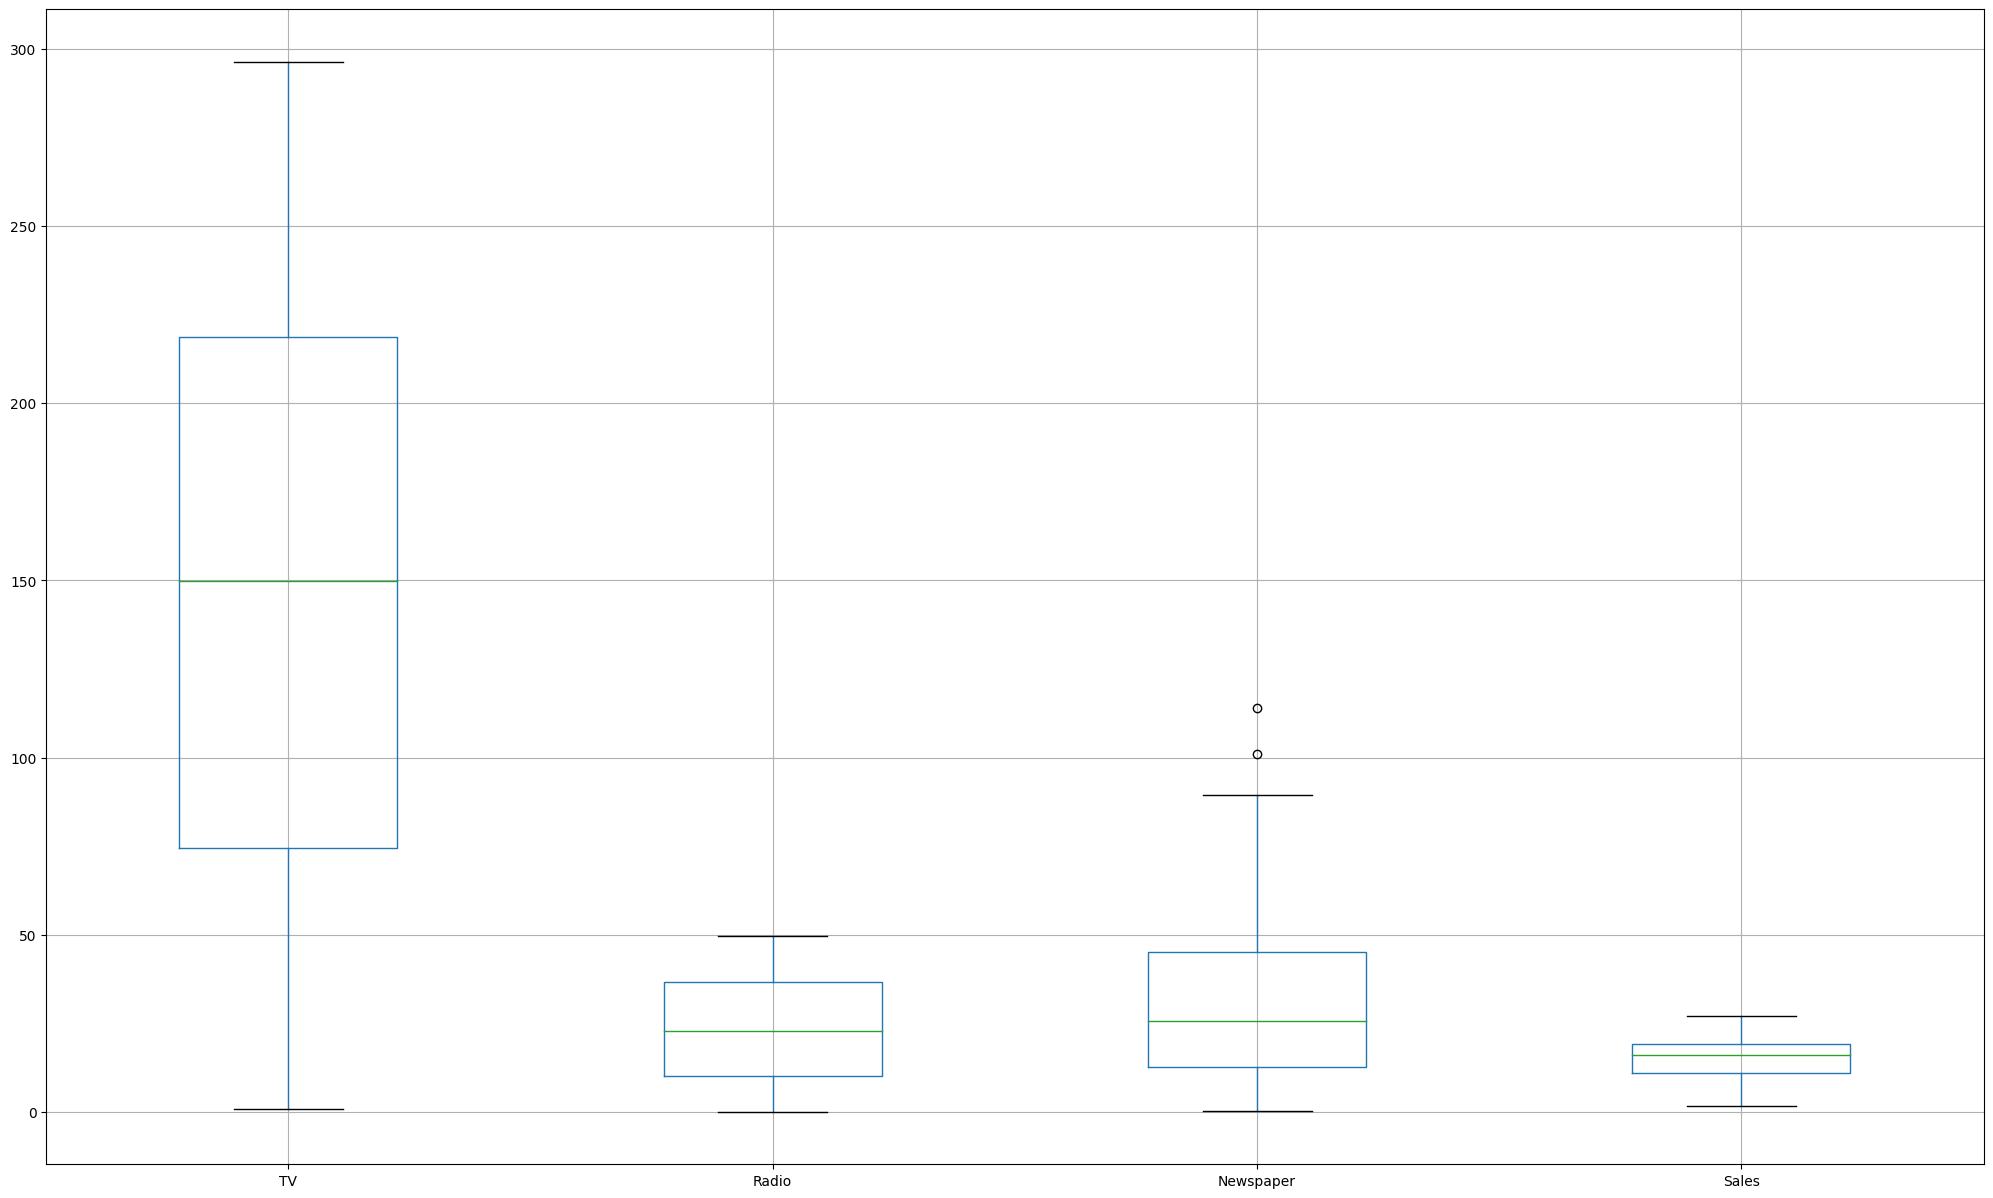

In [12]:
fig, ax = plt.subplots(figsize=(25, 15))
df.boxplot(ax=ax)
plt.show()

<AxesSubplot: >

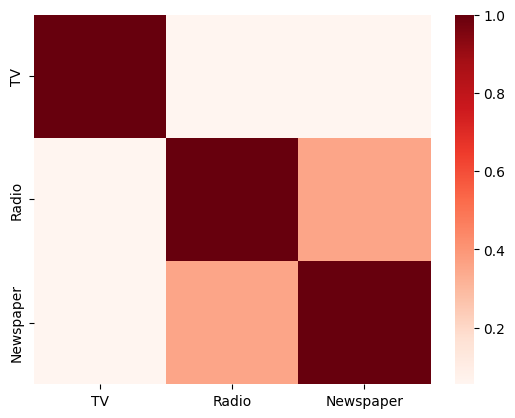

In [13]:
sns.heatmap(df[['TV','Radio','Newspaper']].corr(),cmap='Reds')

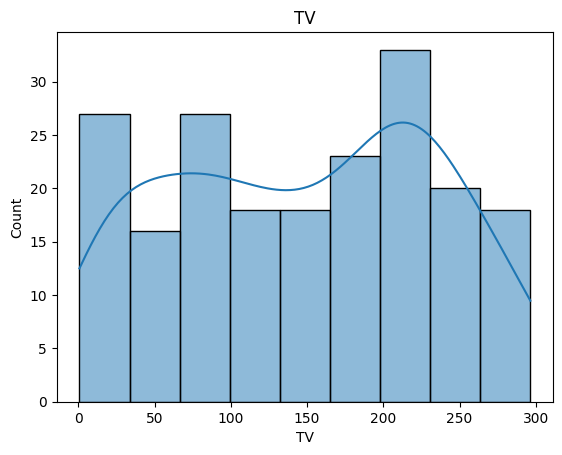

In [14]:
sns.histplot(x='TV', data=df,kde=True)
plt.title('TV')
plt.show()

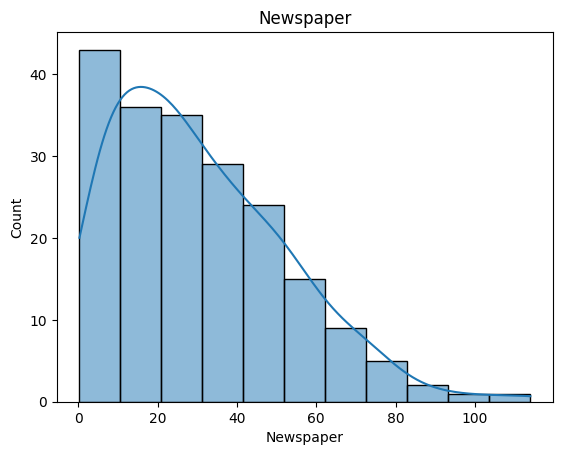

In [15]:
sns.histplot(x='Newspaper', data=df,kde=True)
plt.title('Newspaper')
plt.show()

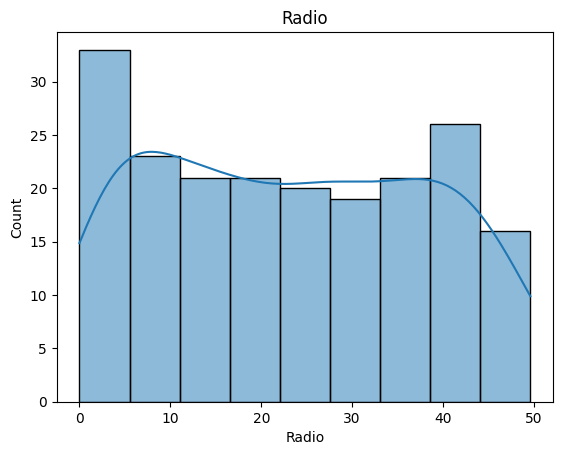

In [16]:
sns.histplot(x='Radio', data=df,kde=True)
plt.title('Radio')
plt.show()

### Split Data

In [17]:
X = df.drop("Sales", axis=1)
y = df["Sales"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 42)

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,train_size=0.8,random_state = 42)

In [20]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (128, 3)
y_train shape: (128,)
X_val shape: (32, 3)
y_val shape: (32,)
X_test shape: (40, 3)
y_test shape: (40,)


# Model Creation

Baseline Model

In [21]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
baseline_mae = mean_squared_error(y_train,y_pred_baseline)
print("Mean Sales:", y_mean)
print("Baseline MSE:", baseline_mae)

Mean Sales: 15.68828125
Baseline MSE: 28.968534545898436


## Linear Regression

In [22]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [23]:
train=model.predict(X_train)
val = model.predict(X_val)
print('Training score: ', round(model.score(X_train, y_train),3))
print('Validation score: ', round(model.score(X_val, y_val),3))

Training score:  0.912
Validation score:  0.784


In [24]:
mse = mean_squared_error(y_train, train)
print("Mean Squared Error TRAIN:", mse)

Mean Squared Error TRAIN: 2.53975816596322


In [25]:
mse = mean_squared_error(y_val, val)
print("Mean Squared Error VALIDATION:", mse)

Mean Squared Error VALIDATION: 3.3624427212884793


In [26]:
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error TEST:", mse)

Mean Squared Error TEST: 2.9639232878079005


### Communication 

In [27]:
res = (y_test - predictions)

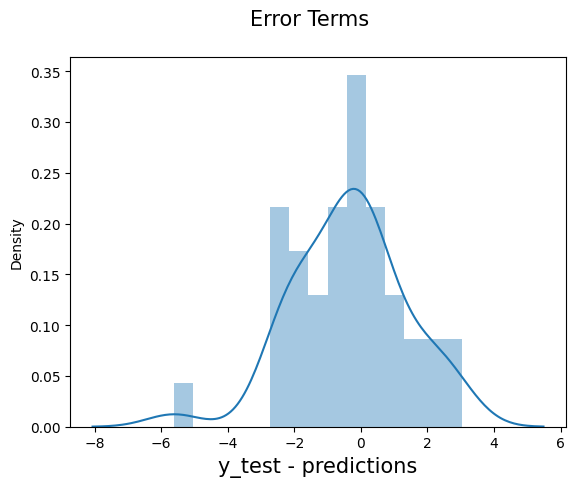

In [28]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - predictions', fontsize = 15)         # X-label
plt.show()

In [29]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.05576069 0.10336332 0.00939324]
Intercept: 4.279364795097576
